In [1]:
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

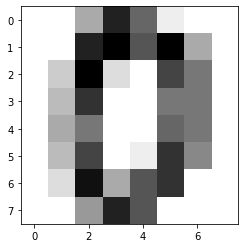

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits.target.size

1797

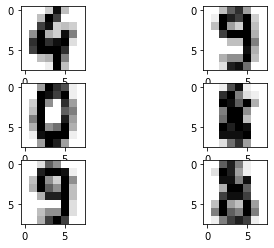

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(321)
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[1792], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[1793], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[1794], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[1795], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r,
interpolation='nearest')


In [9]:
svc.fit(digits.data[1:1790], digits.target[1:1790])

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
svc.predict(digits.data[1791:1797])

array([4, 9, 0, 8, 9, 8])

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logisticRegr = LogisticRegression()

In [20]:
logisticRegr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
predictions = logisticRegr.predict(x_test)

In [22]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


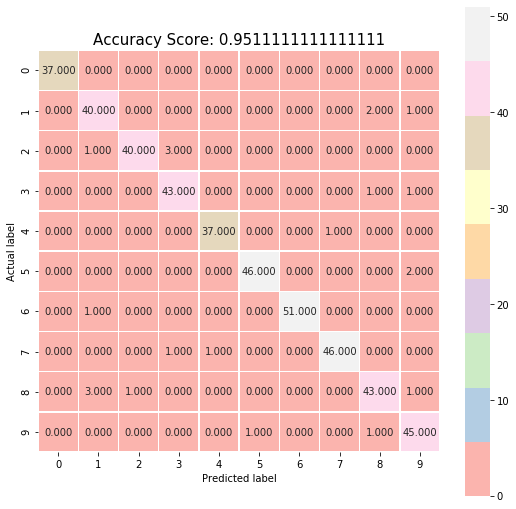

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);